In [4]:
pip install numpy pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df = pd.read_csv("DASS21_1000_Synthetic_Data (1).csv")

df.head()


,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Total_Final_Score,Total_Level
0,P0001,2,0,3,0,1,0,2,1,1,...,3,3,1,3,0,3,3,3,76,Severe
1,P0002,1,0,1,2,0,1,3,3,1,...,2,1,1,3,2,1,2,1,60,Moderate
2,P0003,1,0,2,3,3,2,0,0,3,...,1,2,2,1,1,2,2,2,66,Severe
3,P0004,1,0,1,2,0,1,0,0,0,...,3,0,3,1,0,2,0,1,44,Moderate
4,P0005,0,3,0,3,3,0,3,3,0,...,2,3,0,1,1,2,1,2,68,Severe


In [21]:
df.shape


(1000, 24)

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1000 non-null   object
 1   Q1                 1000 non-null   int64 
 2   Q2                 1000 non-null   int64 
 3   Q3                 1000 non-null   int64 
 4   Q4                 1000 non-null   int64 
 5   Q5                 1000 non-null   int64 
 6   Q6                 1000 non-null   int64 
 7   Q7                 1000 non-null   int64 
 8   Q8                 1000 non-null   int64 
 9   Q9                 1000 non-null   int64 
 10  Q10                1000 non-null   int64 
 11  Q11                1000 non-null   int64 
 12  Q12                1000 non-null   int64 
 13  Q13                1000 non-null   int64 
 14  Q14                1000 non-null   int64 
 15  Q15                1000 non-null   int64 
 16  Q16                1000 non-null   int64 
 

In [27]:
X = df[[f"Q{i}" for i in range(1, 22)]]
y = df["Total_Final_Score"]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [25]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

lr_model = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("lr", LinearRegression())
])

lr_model.fit(X_train, y_train)
print("Training done.")


Training done.


In [40]:
y_pred = rf_model.predict(X_test)

In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 4.9067
Root Mean Squared Error (RMSE): 6.166539548239353
R² Score: 0.629771103105832


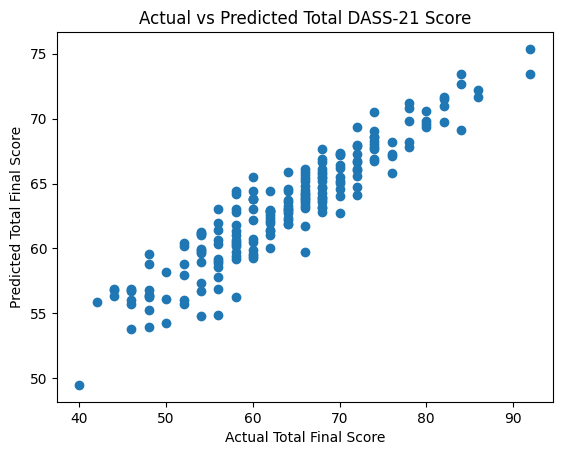

In [42]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Final Score")
plt.ylabel("Predicted Total Final Score")
plt.title("Actual vs Predicted Total DASS-21 Score")
plt.show()


In [15]:
import os
import joblib

save_dir = r"C:\Users\LENOVO LOQ\Desktop\RN- 2\train model"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, "random_forest_dass21_model.pkl")

joblib.dump(rf_model, model_path)

print("Model saved successfully at:")
print(model_path)


Model saved successfully at:
C:\Users\LENOVO LOQ\Desktop\RN- 2\train model\random_forest_dass21_model.pkl
